In [1]:
import numpy as np
import tensorflow as tf
from random import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [2]:
train_X=[]
train_Y=[]

In [3]:
for i in range(50):
    train_X.append(randint(13, 64))
    train_Y.append(1)
    train_X.append(randint(65, 100))
    train_Y.append(0)
    
for i in range(1000):
    train_X.append(randint(13, 64))
    train_Y.append(0)
    train_X.append(randint(65, 100))
    train_Y.append(1)
    
train_X, train_Y=shuffle(train_X, train_Y)

    
print(train_X, train_Y)

[14, 78, 93, 25, 71, 78, 18, 95, 57, 61, 38, 21, 81, 98, 51, 82, 15, 76, 27, 34, 24, 15, 37, 24, 34, 60, 69, 48, 18, 25, 77, 95, 53, 20, 89, 45, 33, 92, 21, 41, 71, 66, 97, 54, 47, 96, 13, 61, 14, 75, 87, 81, 29, 96, 46, 21, 58, 22, 21, 25, 81, 76, 100, 93, 53, 73, 53, 88, 66, 81, 87, 48, 33, 71, 21, 81, 97, 47, 25, 69, 62, 80, 52, 92, 44, 98, 62, 23, 32, 75, 51, 19, 84, 20, 58, 81, 44, 92, 90, 60, 51, 49, 72, 58, 81, 37, 13, 44, 79, 45, 93, 33, 90, 14, 87, 47, 23, 78, 73, 68, 28, 87, 28, 13, 95, 38, 54, 82, 44, 74, 15, 70, 85, 75, 52, 64, 61, 97, 58, 91, 99, 74, 93, 14, 15, 46, 48, 31, 68, 27, 60, 85, 94, 34, 58, 88, 77, 29, 77, 85, 80, 62, 89, 80, 96, 91, 51, 36, 41, 70, 22, 72, 41, 79, 98, 94, 69, 88, 92, 80, 69, 85, 20, 66, 23, 48, 73, 89, 74, 49, 48, 20, 21, 67, 88, 79, 28, 75, 66, 20, 94, 17, 69, 93, 91, 40, 75, 44, 90, 29, 46, 37, 56, 15, 76, 79, 46, 38, 89, 93, 93, 75, 58, 100, 44, 74, 62, 96, 90, 72, 71, 32, 70, 63, 37, 43, 97, 86, 75, 93, 92, 79, 28, 32, 58, 67, 40, 83, 82, 9

In [4]:
train_X=np.array(train_X)
train_Y=np.array(train_Y)

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_X=scaler.fit_transform(train_X.reshape(-1, 1))
print(scaled_train_X)


[[0.01149425]
 [0.74712644]
 [0.91954023]
 ...
 [0.50574713]
 [0.05747126]
 [0.48275862]]


In [6]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [7]:
model=Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="sigmoid"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer=Adam(lr=0.0003), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [9]:
model.fit(x=scaled_train_X, y=train_Y, validation_split=0.2, batch_size=30, epochs=30, shuffle=False, verbose=2)

Epoch 1/30
56/56 - 1s - loss: 0.6540 - accuracy: 0.5655 - val_loss: 0.6434 - val_accuracy: 0.6000
Epoch 2/30
56/56 - 0s - loss: 0.6224 - accuracy: 0.6363 - val_loss: 0.6170 - val_accuracy: 0.6452
Epoch 3/30
56/56 - 0s - loss: 0.5933 - accuracy: 0.6833 - val_loss: 0.5933 - val_accuracy: 0.6905
Epoch 4/30
56/56 - 0s - loss: 0.5658 - accuracy: 0.7250 - val_loss: 0.5699 - val_accuracy: 0.7167
Epoch 5/30
56/56 - 0s - loss: 0.5378 - accuracy: 0.7649 - val_loss: 0.5454 - val_accuracy: 0.7429
Epoch 6/30
56/56 - 0s - loss: 0.5059 - accuracy: 0.7976 - val_loss: 0.5159 - val_accuracy: 0.7738
Epoch 7/30
56/56 - 0s - loss: 0.4719 - accuracy: 0.8315 - val_loss: 0.4892 - val_accuracy: 0.8119
Epoch 8/30
56/56 - 0s - loss: 0.4405 - accuracy: 0.8565 - val_loss: 0.4643 - val_accuracy: 0.8357
Epoch 9/30
56/56 - 0s - loss: 0.4110 - accuracy: 0.8786 - val_loss: 0.4420 - val_accuracy: 0.8429
Epoch 10/30
56/56 - 0s - loss: 0.3841 - accuracy: 0.8917 - val_loss: 0.4225 - val_accuracy: 0.8619
Epoch 11/30
56/56 -

In [10]:
test=np.array([ 35, 45, 99, 65, 72, 31, 67, 80,22,64])
test_Y=np.array([0, 0, 1,1,1,0,1,1,0,0])
test, test_Y=shuffle(test, test_Y)
scaler_test=MinMaxScaler(feature_range=(0,1))
test=scaler_test.fit_transform(test.reshape(-1, 1))
prediction=model.predict(x=test)

In [11]:
print(prediction)

[[0.5073496  0.44434437]
 [0.20329472 0.7576474 ]
 [0.80943114 0.16805735]
 [0.8051399  0.17653435]
 [0.06468359 0.9178103 ]
 [0.79879653 0.18583438]
 [0.53122175 0.42129385]
 [0.34521407 0.6067947 ]
 [0.8079101  0.17251992]
 [0.4596138  0.4910713 ]]


In [12]:
rounded_pred=(np.argmax(prediction, axis=1))
print(rounded_pred)

[0 1 0 0 1 0 0 1 0 1]


## Confusion Matrix

In [13]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [14]:
cm= confusion_matrix(y_true=test_Y, y_pred=rounded_pred)

In [15]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0]
 [1 4]]


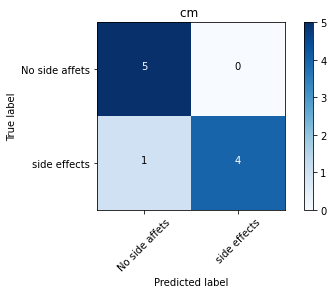

In [16]:
classes=["No side affets", "side effects"]
plot_confusion_matrix(cm=cm, classes=classes, title="cm ")